In [12]:
import nbimporter
import Dataset
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

from torchvision import transforms
import os


import Classi.dataclass as StreetSign


In [2]:
model = Dataset.LeNetColor()
model.load_state_dict(torch.load('modelli\lenet_dataset-10.pth'))
model.eval()

LeNetColor(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 18, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(18, 28, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=700, out_features=360, bias=True)
    (1): ReLU()
    (2): Linear(in_features=360, out_features=252, bias=True)
    (3): ReLU()
    (4): Linear(in_features=252, out_features=100, bias=True)
  )
)

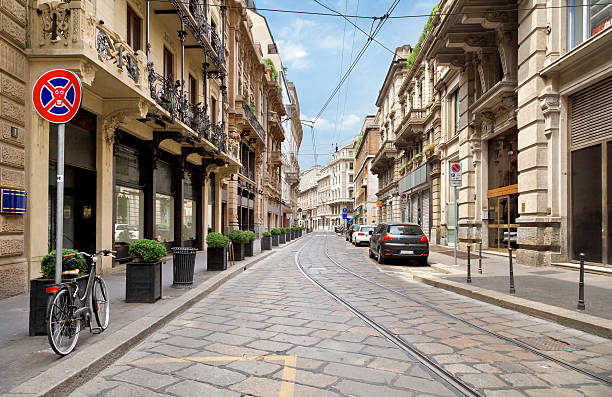

In [3]:
img = Image.open("image\images.png")
img

In [4]:
transform = torchvision.transforms.ToTensor()
img_t = transform(img)

In [5]:
import torchvision.transforms as transforms

# Converte l'immagine in un tensore PyTorch
transform = transforms.ToTensor()
img_t = transform(img)

# Rimuovi il primo canale (canale 0) per ottenere un'immagine a 3 canali
img_t_3_channels = img_t[1:]  # Mantieni solo i canali 1, 2 e 3

# Verifica la forma dell'immagine risultante
print("Shape of img_t_3_channels:", img_t_3_channels.shape)


Shape of img_t_3_channels: torch.Size([3, 397, 612])


In [9]:
pred = model([img_t_3_channels])
print("CNN predictions: ", pred)

TypeError: conv2d() received an invalid combination of arguments - got (list, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list!, !Parameter!, !Parameter!, !tuple!, !tuple!, !tuple!, int)


In [ ]:
pred_dict = pred[0]

boxes = pred_dict["boxes"].detach().numpy()
labels = pred_dict["labels"].detach().numpy()
scores = pred_dict["scores"].detach().numpy()

print("Predizione con lo score più alto: \n bounding box:\t ", boxes[0], "\n Classe:\t", labels[0], "\n score:\t", scores[0])

In [ ]:
threshold = 0.5
idx = np.where(scores > threshold)[0]
boxes = boxes[idx]
labels = labels[idx]
scores = scores[idx]

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img)
ax = plt.gca()
for box, label, score in zip(boxes, labels, scores):
    x1, y1, x2, y2 = box
    w = x2 - x1
    h = y2 - y1
    rect = plt.Rectangle((x1, y1), w, h, fill=False, color="red")
    ax.add_patch(rect)
    ax.text(x1, y1, f"{label}: {score:.2f}", fontsize=15, color="white", bbox=dict(facecolor="red", alpha=0.5))    
plt.show()


In [ ]:
category_map = {
    1: 'indication',
    2: 'prohibitory',
    3: 'warning'
}

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img)
ax = plt.gca()
for box, label, score in zip(boxes, labels, scores):
    x1, y1, x2, y2 = box
    w = x2 - x1
    h = y2 - y1
    rect = plt.Rectangle((x1, y1), w, h, fill=False, color="red")
    ax.add_patch(rect)
    ax.text(x1, y1, f"{category_map[label]}: {score:.2f}", fontsize=15, color="white", bbox=dict(facecolor="red", alpha=0.5))
plt.show()